<a href="https://colab.research.google.com/github/mx5nabcd/mnist_pytorch_clone/blob/main/mnist_pytorch_clone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#전처리

In [ ]:
# 클론 코딩은 아래의 링크에서 12번 박스부터 참고함
# https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

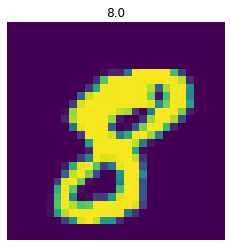

In [ ]:
# Prepare Dataset
# load data
train = pd.read_csv('/content/drive/MyDrive/colab_data/mnist/train.csv',dtype=np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != 'label'].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,targets_numpy,test_size=0.2,random_state=42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

#로지스틱 회귀 만들기

In [ ]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    # Linear part
    self.linear = nn.Linear(input_dim, output_dim)
    # There should be logistic function right?
    # However logistic function in pytorch is in loss function
    # So actually we do not forget to put it, it is only at next parts

  def forward(self, x):
      out = self.linear(x)
      return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#로지스틱 회귀 훈련 및 시각화

In [ ]:
# Training the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    # Define variables
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    # Clear gradients
    optimizer.zero_grad()

    # Forward propagation
    outputs = model(train)

    # Calculate softmax and cross entropy loss
    loss = error(outputs, labels)

    # Calculate gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    # Prediction
    if count % 50 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0
      # Predict test dataset
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))

        # Forward propagation
        outputs = model(test)

        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]

        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
    if count % 500 == 0:
      # Print Loss
      print('Iteration: {} Loss: {} Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8324536085128784 Accuracy: 65.16666412353516%
Iteration: 1000 Loss: 1.6094334125518799 Accuracy: 73.95237731933594%
Iteration: 1500 Loss: 1.284193515777588 Accuracy: 77.16666412353516%
Iteration: 2000 Loss: 1.1880321502685547 Accuracy: 79.05952453613281%
Iteration: 2500 Loss: 1.0358494520187378 Accuracy: 80.53571319580078%
Iteration: 3000 Loss: 0.9319787621498108 Accuracy: 81.67857360839844%
Iteration: 3500 Loss: 0.9110902547836304 Accuracy: 82.44047546386719%
Iteration: 4000 Loss: 0.7586230635643005 Accuracy: 83.08333587646484%
Iteration: 4500 Loss: 0.9764320850372314 Accuracy: 83.42857360839844%
Iteration: 5000 Loss: 0.8011141419410706 Accuracy: 83.76190185546875%
Iteration: 5500 Loss: 0.7540739178657532 Accuracy: 84.03571319580078%
Iteration: 6000 Loss: 0.864480197429657 Accuracy: 84.3452377319336%
Iteration: 6500 Loss: 0.6588611006736755 Accuracy: 84.72618865966797%
Iteration: 7000 Loss: 0.7156856656074524 Accuracy: 84.94047546386719%
Iteration: 7500 Loss: 0.

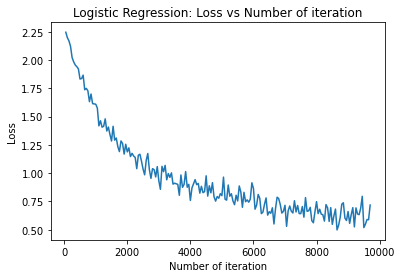

In [ ]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel('Number of iteration')
plt.ylabel('Loss')
plt.title('Logistic Regression: Loss vs Number of iteration')
plt.show()

#인공신경망 만들기

In [ ]:
# Create ANN Model
class ANNModel(nn.Module):

  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()

    # Linear function 1: 784 --> 150
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    # Non-linearity 1
    self.relu1 = nn.ReLU()

    # Linear function 2: 150 --> 150
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    # Non-linearity 2
    self.tanh2 = nn.Tanh()

    # Linear function 3: 150 --> 150
    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    # Non-linearity 3
    self.elu3 = nn.ELU()

    # Linear function 4 (readout): 150 --> 10
    self.fc4 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # Linear function 1
    out = self.fc1(x)
    # Non-linearity 1
    out = self.relu1(out)

    # Linear function 2
    out = self.fc2(out)
    # Non-linearity
    out = self.tanh2(out)

    # Linear function 3
    out = self.fc3(out)
    # Non-linearity 3
    out = self.elu3(out)

    # Linear function 4 (readout)
    out = self.fc4(out)
    return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#인공신경망 훈련 및 시각화

In [ ]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    # Clear gradients
    optimizer.zero_grad()
    
    # Forward propagation
    outputs = model(train)

    # Calculate softmax and ross entropy loss
    loss = error(outputs, labels)

    # Calculating gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    if count % 50 == 0:
      # Calculate Accuracy
      correct = 0
      total = 0
      # Predict test dataset
      for images, labels in test_loader:

        test = Variable(images.view(-1, 28*28))

        # Forward propagation
        outputs = model(test)

        # Get predictions from the maximum value
        predicted = torch.max(outputs.data, 1)[1]

        # Total number of labels
        total += len(labels)

        # Total correct predictions
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      # store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500 == 0:
      # Pinrt Loss
      print('Iteration: {} Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.7609339356422424  Accuracy: 80.55952453613281 %
Iteration: 1000 Loss: 0.4584257900714874  Accuracy: 87.83333587646484 %
Iteration: 1500 Loss: 0.22947700321674347  Accuracy: 89.4047622680664 %
Iteration: 2000 Loss: 0.29822754859924316  Accuracy: 90.41666412353516 %
Iteration: 2500 Loss: 0.31071943044662476  Accuracy: 91.77381134033203 %
Iteration: 3000 Loss: 0.12377118319272995  Accuracy: 92.52381134033203 %
Iteration: 3500 Loss: 0.23916518688201904  Accuracy: 93.30952453613281 %
Iteration: 4000 Loss: 0.06472515314817429  Accuracy: 93.9047622680664 %
Iteration: 4500 Loss: 0.3108323812484741  Accuracy: 94.30952453613281 %
Iteration: 5000 Loss: 0.10066327452659607  Accuracy: 94.5952377319336 %
Iteration: 5500 Loss: 0.1919924020767212  Accuracy: 94.76190185546875 %
Iteration: 6000 Loss: 0.20635457336902618  Accuracy: 95.08333587646484 %
Iteration: 6500 Loss: 0.09759292751550674  Accuracy: 95.23809814453125 %
Iteration: 7000 Loss: 0.11313833296298981  Accuracy: 95.75 

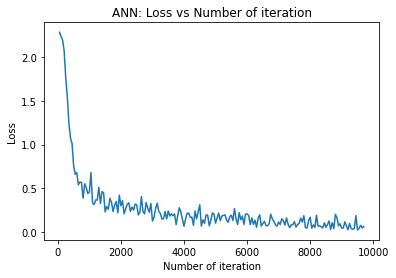

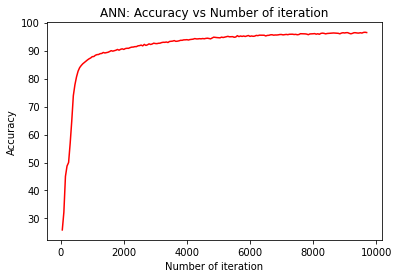

In [ ]:
# visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list, accuracy_list, color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

#합성곱 신경망 만들기

In [ ]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#합성곱 신경망 훈련 및 시각화

In [ ]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.12181191146373749  Accuracy: 96.27381134033203 %
Iteration: 1000  Loss: 0.04274549335241318  Accuracy: 97.48809814453125 %
Iteration: 1500  Loss: 0.034582655876874924  Accuracy: 97.47618865966797 %
Iteration: 2000  Loss: 0.016646672040224075  Accuracy: 98.05952453613281 %


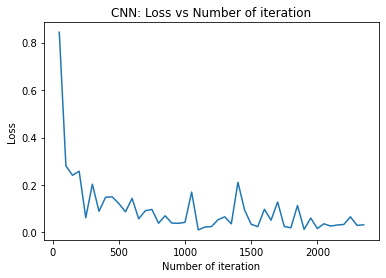

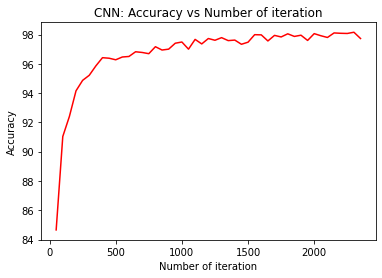

In [ ]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color='red')
plt.xlabel('Number of iteration')
plt.ylabel('Accuracy')
plt.title('CNN: Accuracy vs Number of iteration')
plt.show()